### 知りたいこと

* タイタニック号の乗客はどのような人たちだったのか？
* それぞれの乗客はどのデッキにいたか？また、それは客室の種類とどのような関係にあったか？
* 乗客は主にどこから来たのか？
* 家族連れか、単身者か？
* 沈没からの生還者には、どのような要因があったのか？

In [9]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
titanic_df = pd.read_csv('train.csv')

In [6]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### タイタニック号の乗客はどのような人たちだったのか？

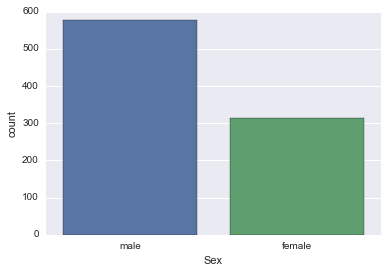

In [10]:
sns.countplot('Sex', data=titanic_df)

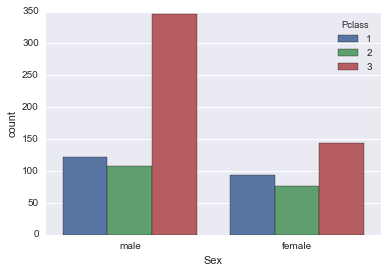

In [11]:
sns.countplot('Sex', data=titanic_df, hue='Pclass')

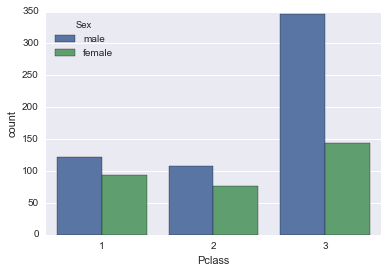

In [12]:
sns.countplot('Pclass', data=titanic_df, hue='Sex')

In [15]:
# 子供という情報を付与する
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex
    
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

In [14]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


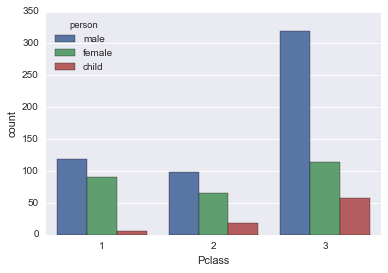

In [17]:
sns.countplot('Pclass', data=titanic_df, hue='person')

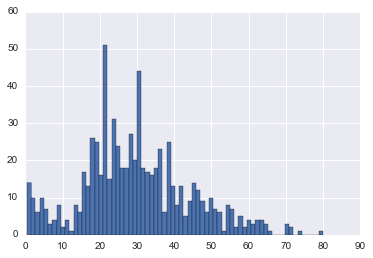

In [18]:
titanic_df['Age'].hist(bins=70)

In [20]:
titanic_df['Age'].mean()

29.69911764705882

In [21]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

※ここまでで、タイタニック号にどのような乗客が乗っていたかが少しわかった

/Users/nakanoken/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


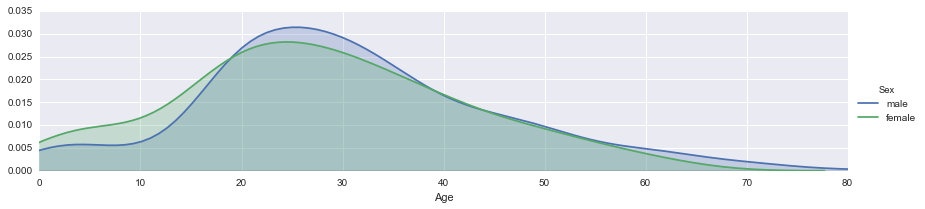

In [22]:
# 1つのプロットに複数並べる
flg = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)
flg.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
flg.set(xlim=(0,oldest))
flg.add_legend()

/Users/nakanoken/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


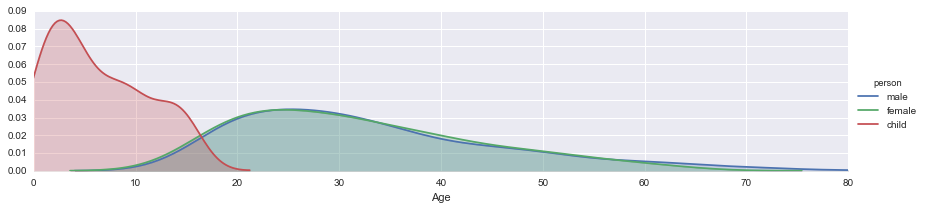

In [23]:
# 1つのプロットに複数並べる
flg = sns.FacetGrid(titanic_df, hue='person', aspect=4)
flg.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
flg.set(xlim=(0,oldest))
flg.add_legend()

/Users/nakanoken/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


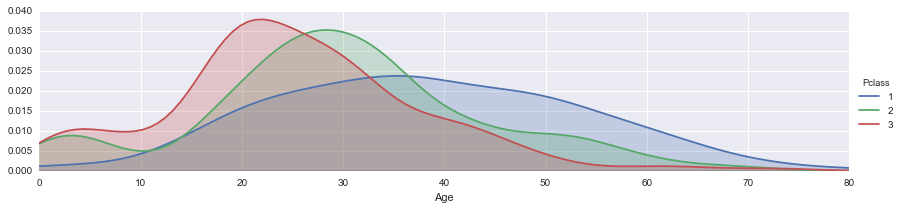

In [24]:
# 1つのプロットに複数並べる
flg = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
flg.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
flg.set(xlim=(0,oldest))
flg.add_legend()

In [25]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [28]:
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [29]:
levels = []
for level in deck:
    levels.append(level[0])

In [32]:
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

In [33]:
cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


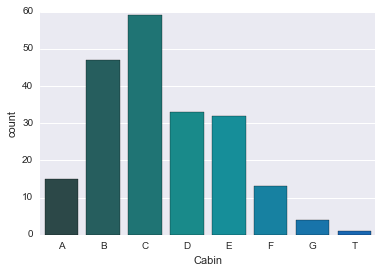

In [34]:
sns.countplot('Cabin', data=cabin_df, palette='winter_d', order=sorted(set(levels)))

In [44]:
# 間違えて入力されたCabinを削除
cabin_df = cabin_df[cabin_df.Cabin != 'T']

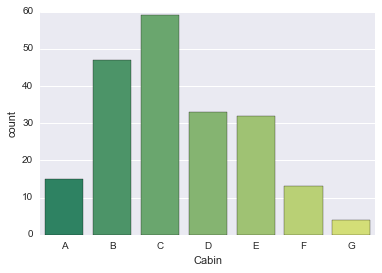

In [46]:
sns.countplot('Cabin', data=cabin_df, palette='summer', order=sorted(set(cabin_df.Cabin)))

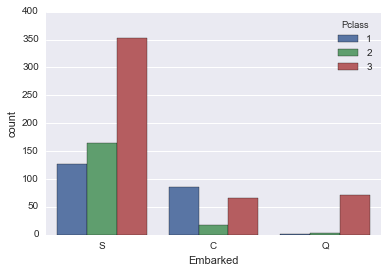

In [50]:
# 乗客がどこから乗り込んだか？
sns.countplot('Embarked', data=titanic_df, hue='Pclass')

In [51]:
from collections import Counter

In [52]:
# nanを含めて件数表示
Counter(titanic_df.Embarked)

Counter({'Q': 77, nan: 2, 'S': 644, 'C': 168})

In [55]:
# value_countsではnanは表示されない
titanic_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [56]:
titanic_df['Alone'] = titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, dtype: int64

In [57]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

/Users/nakanoken/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


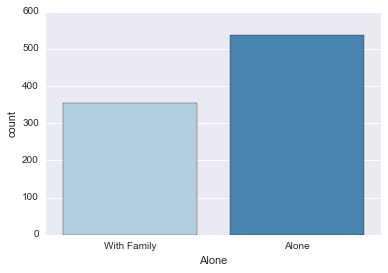

In [61]:
sns.countplot('Alone', data=titanic_df, palette='Blues')

In [62]:
titanic_df['Survivar'] = titanic_df.Survived.map({0:'no', 1:'yes'})

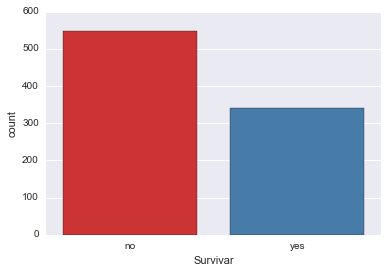

In [63]:
sns.countplot('Survivar', data=titanic_df, palette='Set1')

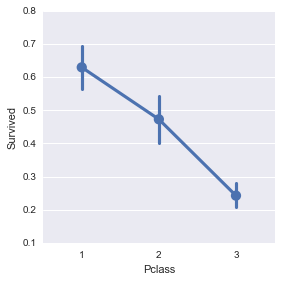

In [65]:
sns.factorplot('Pclass', 'Survived', data=titanic_df, order=[1,2,3])

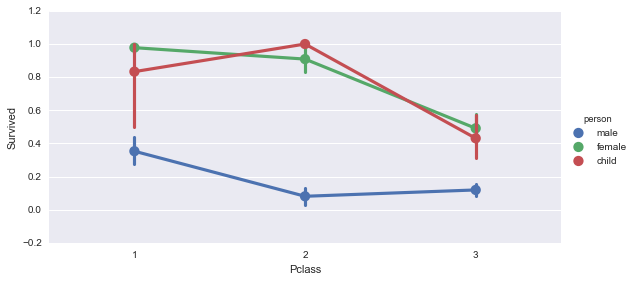

In [68]:
sns.factorplot('Pclass', 'Survived', hue='person', data=titanic_df, order=[1,2,3], aspect=2)

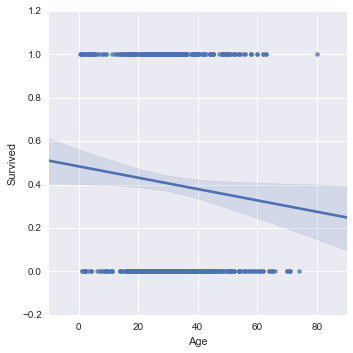

In [69]:
sns.lmplot('Age', 'Survived', data=titanic_df)

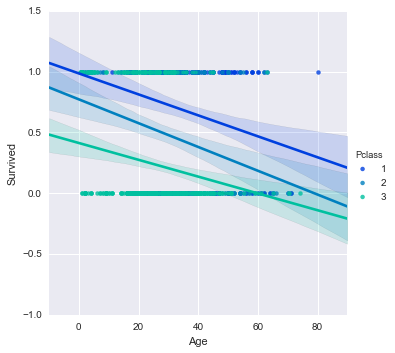

In [70]:
sns.lmplot('Age', 'Survived', hue='Pclass', palette='winter', hue_order=[1,2,3], data=titanic_df)

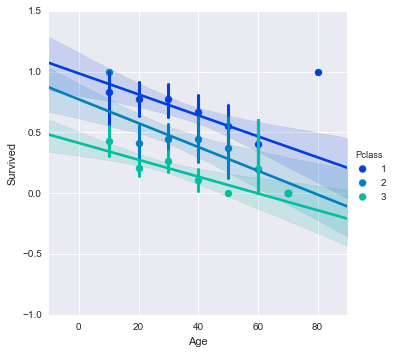

In [71]:
generations = [10,20,30,40,50,60,70,80]
sns.lmplot('Age', 'Survived', hue='Pclass', palette='winter', hue_order=[1,2,3], data=titanic_df, x_bins=generations)

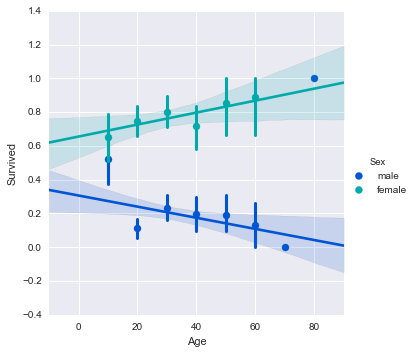

In [72]:
sns.lmplot('Age', 'Survived', hue='Sex', palette='winter', data=titanic_df, x_bins=generations)

In [73]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivar
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no
